## 시간 함수 조작

In [1]:
import time

In [6]:
formatted = time.strftime("%Y %m %d %H %M %S", time.localtime(time.time()))

print(formatted)

2023 10 17 12 56 31


## 영상 저장 테스트

In [1]:
import cv2
import os
import time
from ultralytics import YOLO

capture = cv2.VideoCapture("http://keticmr.iptime.org:22080/WorkDevCarAI/carai/api/web/static/20231002_human.mp4")

width = int(capture.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
current_time = time.time()

fps = int(capture.get(cv2.CAP_PROP_FPS))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
filename = str(time.strftime('%Y-%m-%d-%H-%M-%S', time.localtime(current_time)))
path = os.getcwd() + "/video/out/" + f"{filename}.mp4"
out = cv2.VideoWriter(path, fourcc, fps, (width, height))

print(path)

/Users/bhc/Desktop/dev/esp-python/video/out/2023-10-17-15-36-59.mp4


In [2]:
model = YOLO(os.getcwd() + "/weights/" + "yolov8n.pt")

while capture.isOpened:
    grabbed, frame = capture.read()

    if grabbed:
        results = model(frame)
        annotated_frame = results[0].plot()
        out.write(annotated_frame)

    else:
        break

capture.release()
out.release()


0: 384x640 1 car, 43.8ms
Speed: 2.0ms preprocess, 43.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 39.9ms
Speed: 1.4ms preprocess, 39.9ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 41.5ms
Speed: 1.7ms preprocess, 41.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 37.9ms
Speed: 1.5ms preprocess, 37.9ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 39.5ms
Speed: 1.5ms preprocess, 39.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 40.9ms
Speed: 1.6ms preprocess, 40.9ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 40.0ms
Speed: 1.6ms preprocess, 40.0ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 39.3ms
Speed: 1.6ms preprocess, 39.3ms inference, 0.4ms post

## YOLOv8 추론 로그 테스트

### 객체 한개

In [90]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

model = YOLO("weights/yolov8n.pt")


0: 384x640 1 car, 44.7ms
Speed: 1.8ms preprocess, 44.7ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


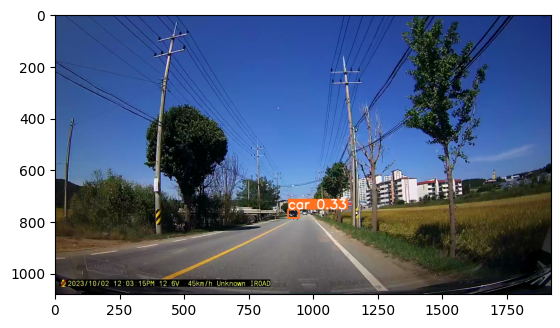

In [76]:
cap = cv2.VideoCapture("http://keticmr.iptime.org:22080/WorkDevCarAI/carai/api/web/static/20231002_human.mp4")

ret, frame = cap.read()
results = model(frame)
ann_frame = results[0].plot()
ann_frame = cv2.cvtColor(ann_frame, cv2.COLOR_BGR2RGB)

plt.imshow(ann_frame)

In [47]:
for r in results:
    print(r.boxes)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([2.])
conf: tensor([0.3340])
data: tensor([[9.0090e+02, 7.5324e+02, 9.4240e+02, 7.8610e+02, 3.3405e-01, 2.0000e+00]])
id: None
is_track: False
orig_shape: (1080, 1920)
shape: torch.Size([1, 6])
xywh: tensor([[921.6536, 769.6679,  41.4988,  32.8601]])
xywhn: tensor([[0.4800, 0.7127, 0.0216, 0.0304]])
xyxy: tensor([[900.9042, 753.2379, 942.4030, 786.0980]])
xyxyn: tensor([[0.4692, 0.6974, 0.4908, 0.7279]])


In [56]:
x1, y1, x2, y2, conf, clss = results[0].boxes.data.cpu().numpy()[0]

In [84]:
print(results[0].boxes.data.cpu().numpy()[0][5])

2.0


In [64]:
import time

timestamp = time.time()

In [66]:
data = {}

data["timestamp"] = timestamp
data["x1"] = x1
data["y1"] = y1
data["x2"] = x2
data["y2"] = y2
data["conf"] = conf
data["clss"] = clss

print(data)

{'timestamp': 1697598315.8479948, 'clss': 2.0, 'conf': 0.33404538, 'x1': 900.9042, 'y1': 753.23785, 'x2': 942.403, 'y2': 786.09796}


In [67]:
log = []

log.append(data)

In [68]:
print(log)

[{'timestamp': 1697598315.8479948, 'clss': 2.0, 'conf': 0.33404538, 'x1': 900.9042, 'y1': 753.23785, 'x2': 942.403, 'y2': 786.09796}]


### 객체 2개 이상

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

model = YOLO("weights/yolov8n.pt")


0: 384x640 11 cars, 43.2ms
Speed: 1.7ms preprocess, 43.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


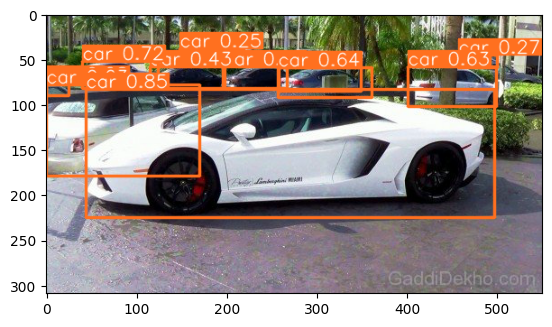

In [143]:
cap = cv2.VideoCapture("test.jpg")

ret, frame = cap.read()
results = model(frame)
ann_frame = results[0].plot()
ann_frame = cv2.cvtColor(ann_frame, cv2.COLOR_BGR2RGB)

plt.imshow(ann_frame)

In [144]:
len(results)

1

In [146]:
len(results[0])

11

In [147]:
len(results[0].boxes.data.cpu().numpy())

11

## 데이터 전처리

In [201]:
import cv2
import matplotlib.pyplot as plt

cap = cv2.VideoCapture("test.jpg")
log = []

ret, frame = cap.read()

while True:
    results = model(frame)
    now = time.time()
    
    
    for r in results:

        if not r :
            continue

        tmp = r.boxes.data.cpu().numpy()

        for t in tmp:
            data = {}

            data["timestamp"] = now
            data["x1"] = t[0]
            data["y1"] = t[1]
            data["x2"] = t[2]
            data["y2"] = t[3]
            data["conf"] = t[4]
            data["clss"] = t[5]

            log.append(data)

    ret, frame = cap.read()
    
    if not ret:
        break


0: 384x640 11 cars, 50.2ms
Speed: 1.9ms preprocess, 50.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


In [202]:
len(log)

11

## Dataframe 저장

In [210]:
from pandas import Series, DataFrame
import os

dflog = DataFrame(log)

In [214]:
dflog

,timestamp,x1,y1,x2,y2,conf,clss
0,1.697613e+09,44.564133,83.877449,497.050903,225.038193,0.852668,2.0
1,1.697613e+09,40.495911,52.653320,124.934113,82.485367,0.715467,2.0
2,1.697613e+09,257.108276,59.694962,361.964722,92.416885,0.636559,2.0
3,1.697613e+09,0.193089,78.002106,170.079315,179.465820,0.634753,2.0
4,1.697613e+09,401.038361,58.866402,499.967865,102.982857,0.633017,2.0
5,1.697613e+09,258.039612,59.454628,349.302826,85.607819,0.532074,2.0
6,1.697613e+09,115.541931,58.301594,198.065323,82.866257,0.434773,2.0
7,1.697613e+09,0.000000,75.470650,25.419336,90.973518,0.284016,2.0
8,1.697613e+09,457.122467,45.268703,500.401520,59.825336,0.266510,2.0
9,1.697613e+09,196.064468,58.709766,267.796051,82.626503,0.256110,2.0


In [215]:
path = os.getcwd() + "/logs/evclog.csv"

dflog.to_csv(path)

# 2023 12 14
## 이미지 추론

In [7]:
import cv2
import numpy as np
import requests

url = "http://evc.re.kr:20096/www/dog.jpg"

img_nparr = np.asarray(bytearray(requests.get(url).content), dtype=np.uint8)
img = cv2.imdecode(img_nparr, cv2.IMREAD_COLOR)